In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pysentani

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
survey = pd.read_excel('../data-clean/sentani-merged-cleaned-2015-06-10.xlsx',na_values=[''])
print('number of entries =', len(survey))
print('number of columns =', len(survey.columns))

number of entries = 1184
number of columns = 274


In [6]:
pysentani.similar_columns(survey,'hrs')

app_lighting_hrs
app_TV_hrs
app_radio_hrs
app_fridge_hrs
app_fan_hrs
app_rice_cooker_hrs
app_other_cooking_hrs
app_welder_hrs
app_grinder_hrs
app_saw_hrs
app_other_tools_hrs
app_other_hrs


In [7]:
survey['electricity_expenditure_monthly'] = pysentani.elec_expenditure_monthly(survey)
survey['electricity_expenditure_monthly_log'] = survey['electricity_expenditure_monthly'].replace(0, 1)
survey['electricity_expenditure_monthly_log'] = np.log10(survey['electricity_expenditure_monthly_log'])
survey['monthly_income'] = pysentani.income_monthly(survey)
survey['access_type'] = pysentani.access_type(survey)
survey['monthly_income'] = survey['monthly_income'].replace(0, 1)
survey['log_monthly_income'] = np.log10(survey['monthly_income'])

In [8]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

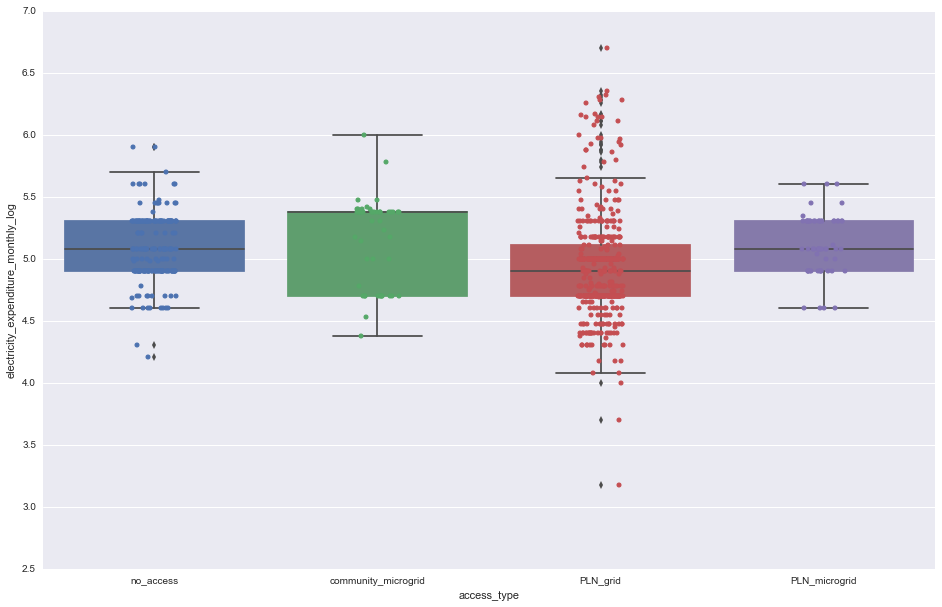

In [9]:
box = sns.boxplot(x="access_type",y="electricity_expenditure_monthly_log",data=survey)
jitter = sns.stripplot(x="access_type",y="electricity_expenditure_monthly_log",data=survey,jitter=True,size=4)

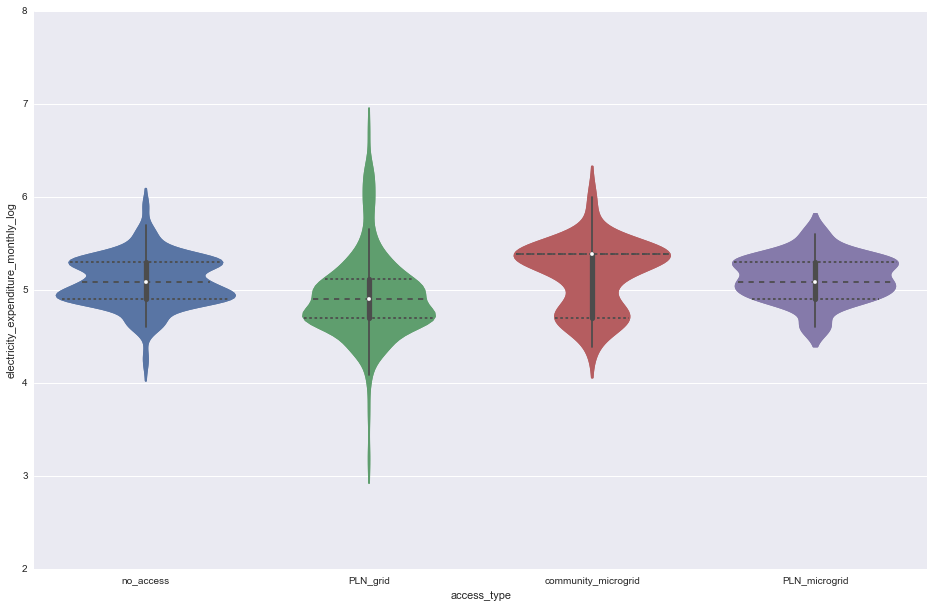

In [10]:
eeml_dropna_survey = survey.dropna(subset=['electricity_expenditure_monthly_log'])
sns.violinplot(x="access_type",y="electricity_expenditure_monthly_log",data=eeml_dropna_survey,inner="quartile")
sns.violinplot(x="access_type",y="electricity_expenditure_monthly_log",data=eeml_dropna_survey,inner="box")

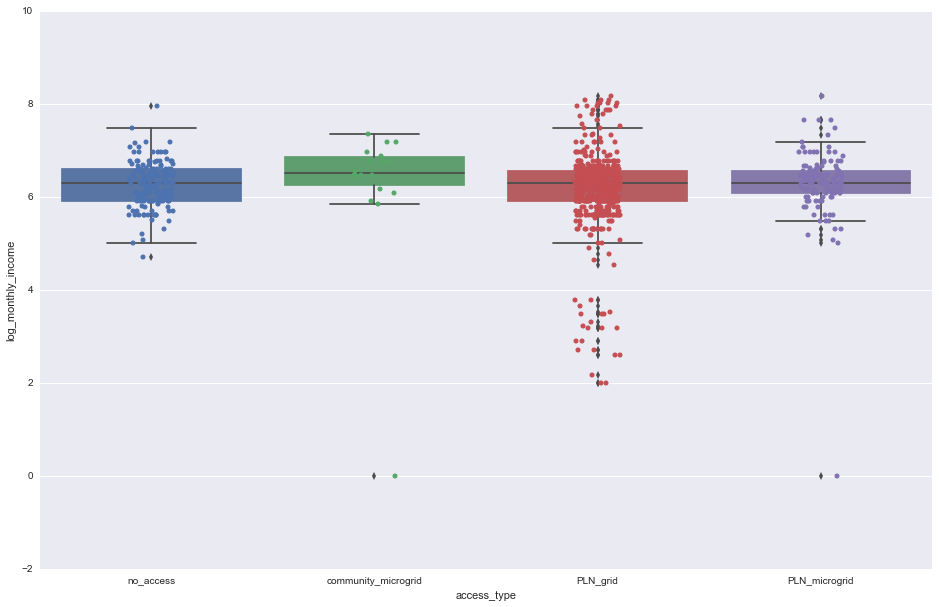

In [11]:
box = sns.boxplot(x="access_type",y="log_monthly_income",data=survey)
jitter = sns.stripplot(x="access_type",y="log_monthly_income",data=survey,jitter=True,size=4)

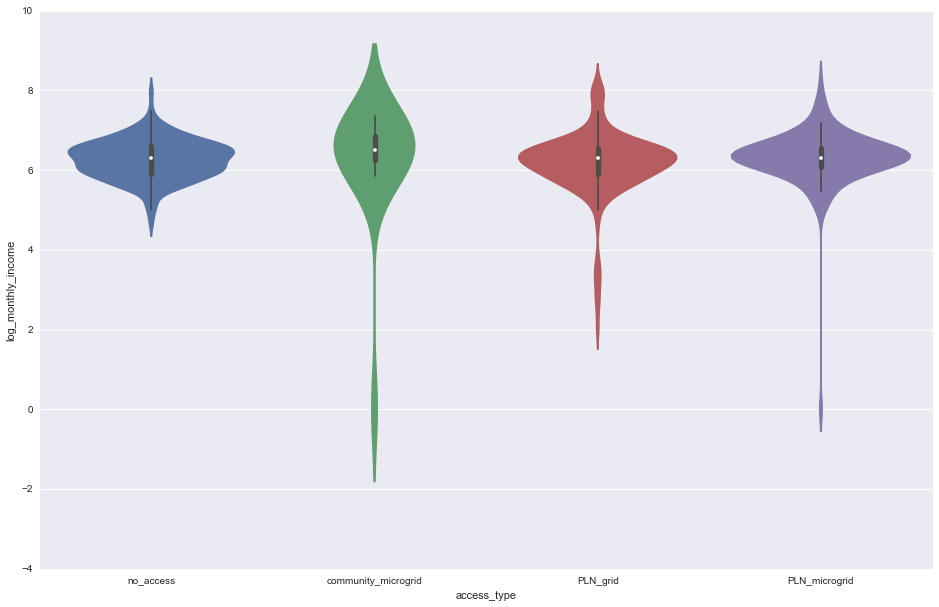

In [12]:
lmi_dropna_survey = survey.dropna(subset=['log_monthly_income'])
sns.violinplot(x="access_type",y="log_monthly_income",data=lmi_dropna_survey)

In [13]:
def expenditure_to_income(df):
    result = df['electricity_expenditure_monthly']/df['monthly_income']
    return result

survey['expenditure_to_income'] = survey.apply(expenditure_to_income, axis=1)
survey['expenditure_to_income']
    

0       0.250000
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11      0.533333
12           NaN
13      0.020000
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
          ...   
1154    0.125000
1155    0.125000
1156    0.062500
1157    0.112500
1158         NaN
1159    0.087500
1160    0.052632
1161    0.075000
1162    0.009867
1163         NaN
1164    0.100000
1165         NaN
1166    0.025000
1167    0.018519
1168         NaN
1169         NaN
1170         NaN
1171         NaN
1172    0.044444
1173         NaN
1174    0.020313
1175         NaN
1176         NaN
1177    0.250000
1178    0.088889
1179         NaN
1180         NaN
1181    0.5000

(-1, 1)

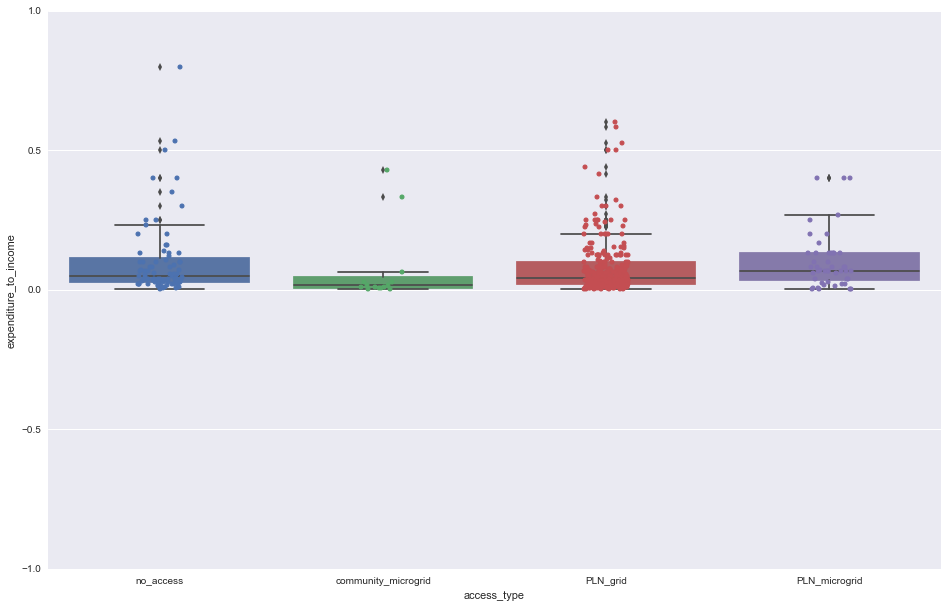

In [14]:
box = sns.boxplot(x="access_type",y="expenditure_to_income",data=survey)
jitter = sns.stripplot(x="access_type",y="expenditure_to_income",data=survey,jitter=True,size=4)
plt.ylim((-1,1))

In [15]:
survey[survey['expenditure_to_income'] == 100000][['electricity_expenditure_monthly','monthly_income','village_name','demand_point','simserial']] 

,electricity_expenditure_monthly,monthly_income,village_name,demand_point,simserial
69,100000,1,Kensio,household,8962100344326665076f


In [16]:
survey[survey['demand_point'] == "household"]['access_type'].value_counts()

PLN_grid               548
no_access              305
PLN_microgrid          156
community_microgrid     52
dtype: int64

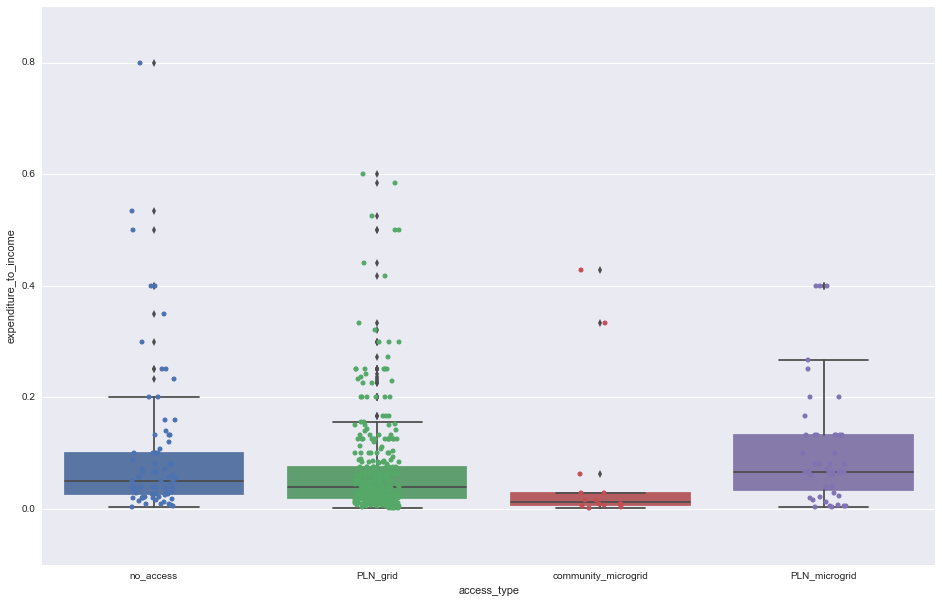

In [17]:
eti_adjust_survey = survey[survey['expenditure_to_income'] <= 1]

box = sns.boxplot(x="access_type",y="expenditure_to_income",data=eti_adjust_survey)
jitter = sns.stripplot(x="access_type",y="expenditure_to_income",data=eti_adjust_survey,jitter=True,size=4)

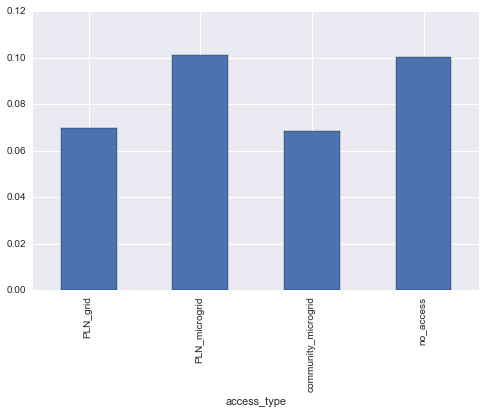

In [18]:
fig_size1 = plt.rcParams["figure.figsize"]
fig_size1[0] = 8
fig_size1[1] = 5
plt.rcParams["figure.figsize"] = fig_size1

eti_adjust_survey.groupby('access_type')['expenditure_to_income'].mean().plot(kind="bar" )

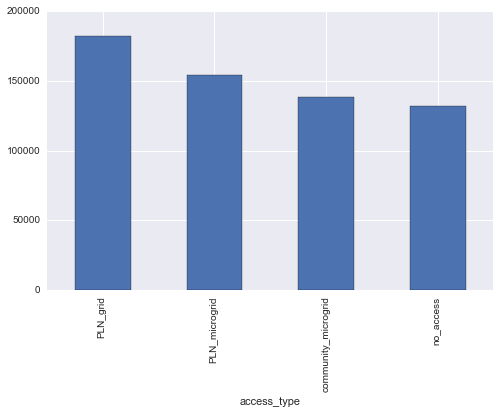

In [19]:
eti_adjust_survey.groupby('access_type')['electricity_expenditure_monthly'].mean().plot(kind="bar")

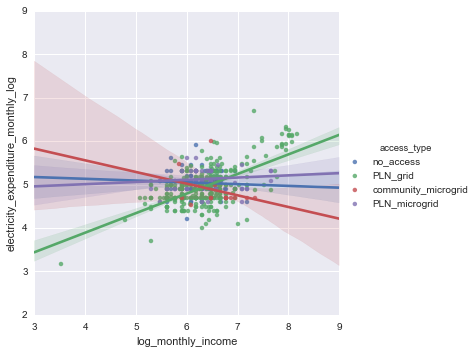

In [20]:
fig_size2 = plt.rcParams["figure.figsize"]
fig_size2[0] = 18
fig_size2[1] = 15
plt.rcParams["figure.figsize"] = fig_size2

sns.lmplot(x="log_monthly_income",y="electricity_expenditure_monthly_log", data = eti_adjust_survey, hue="access_type")

In [23]:

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('access_type ~ electricity_expenditure_monthly_log + log_monthly_income', data=eti_adjust_survey).fit()

print(results.summary())

ValueError: shapes (492,4) and (492,4) not aligned: 4 (dim 1) != 492 (dim 0)